In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# About Dataset
Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

# Read Data

In [ ]:
train_data = pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
train_data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
5,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
6,11,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
7,13,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
8,14,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
9,15,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27


In [ ]:
train_data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
train_data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

[Text(0.5, 1.0, 'Cut counts')]

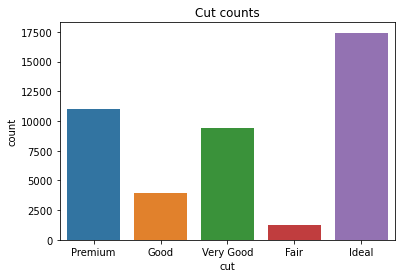

In [ ]:
Cutplot=sns.countplot(x='cut',data= train_data).set(title='Cut counts')
Cutplot

[Text(0.5, 1.0, 'Colors counts')]

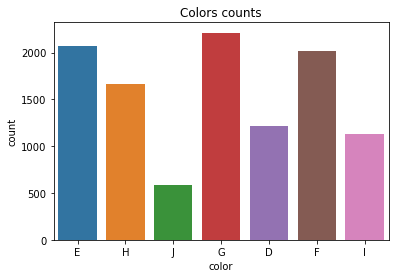

In [ ]:
Colorplot=sns.countplot(x='color',data= test_data).set(title='Colors counts')
Colorplot

[Text(0.5, 1.0, 'Colors counts')]

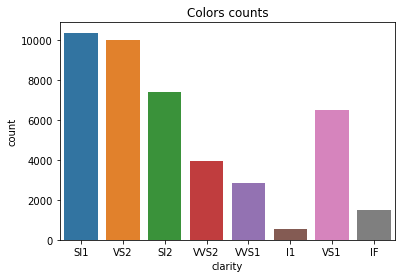

In [ ]:
Clarityplot=sns.countplot(x='clarity',data= train_data).set(title='Colors counts')
Clarityplot

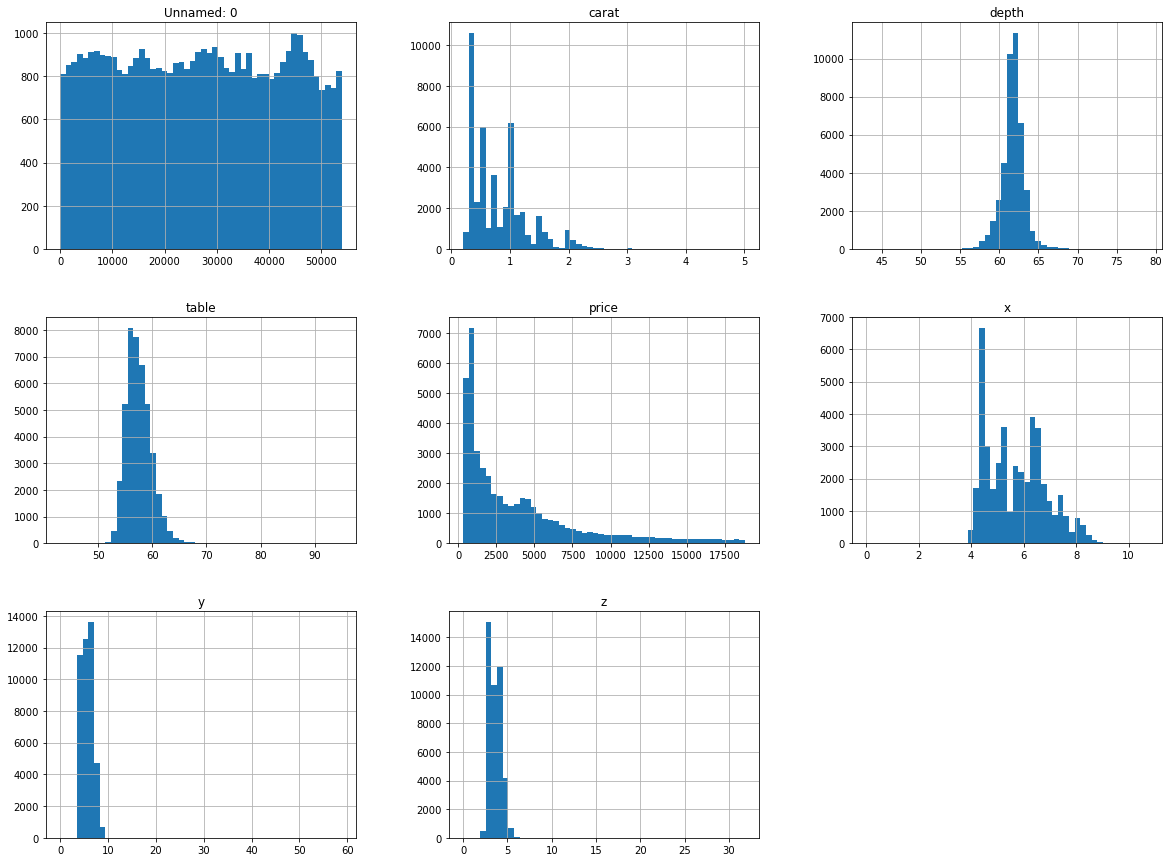

In [ ]:
train_data.hist(bins=50, figsize=(20,15));

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
corr_matrix = train_data.corr()
corr_matrix

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.374606,-0.040978,-0.116833,-0.301711,-0.407353,-0.395176,-0.400306
carat,-0.374606,1.000000,0.022599,0.191260,0.923801,0.974368,0.946001,0.948625
depth,-0.040978,0.022599,1.000000,-0.292084,-0.014393,-0.031088,-0.034945,0.088335
table,-0.116833,0.191260,-0.292084,1.000000,0.136975,0.204768,0.191469,0.159775
price,-0.301711,0.923801,-0.014393,0.136975,1.000000,0.887483,0.863748,0.860625
x,-0.407353,0.974368,-0.031088,0.204768,0.887483,1.000000,0.969541,0.966909
y,-0.395176,0.946001,-0.034945,0.191469,0.863748,0.969541,1.000000,0.944215
z,-0.400306,0.948625,0.088335,0.159775,0.860625,0.966909,0.944215,1.000000


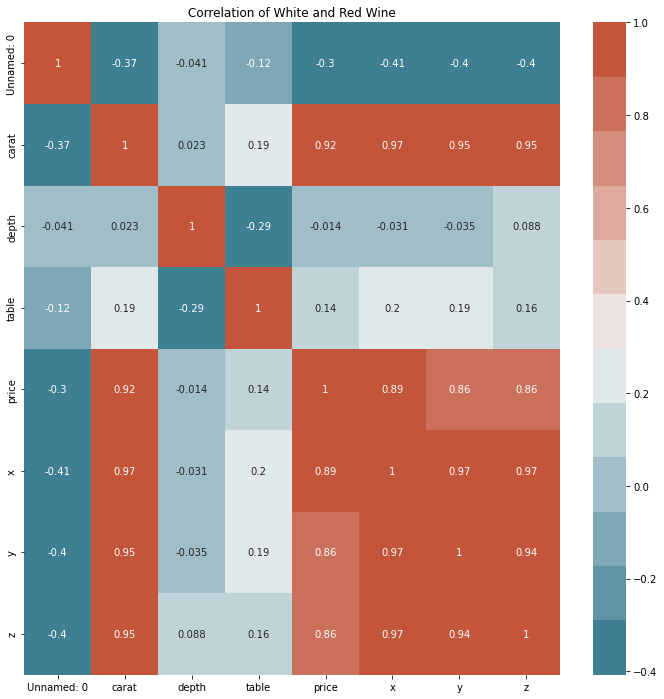

In [ ]:
plt.figure(figsize=(12, 12))
df_corr = train_data.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Correlation of White and Red Wine")
plt.show()

In [ ]:
corr_matrix = train_data.corr()
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
carat         0.923801
x             0.887483
y             0.863748
z             0.860625
table         0.136975
depth        -0.014393
Unnamed: 0   -0.301711
Name: price, dtype: float64

In [ ]:
train_data = train_data.drop(['depth',],axis=1)
test_data = test_data.drop(['depth',],axis=1)

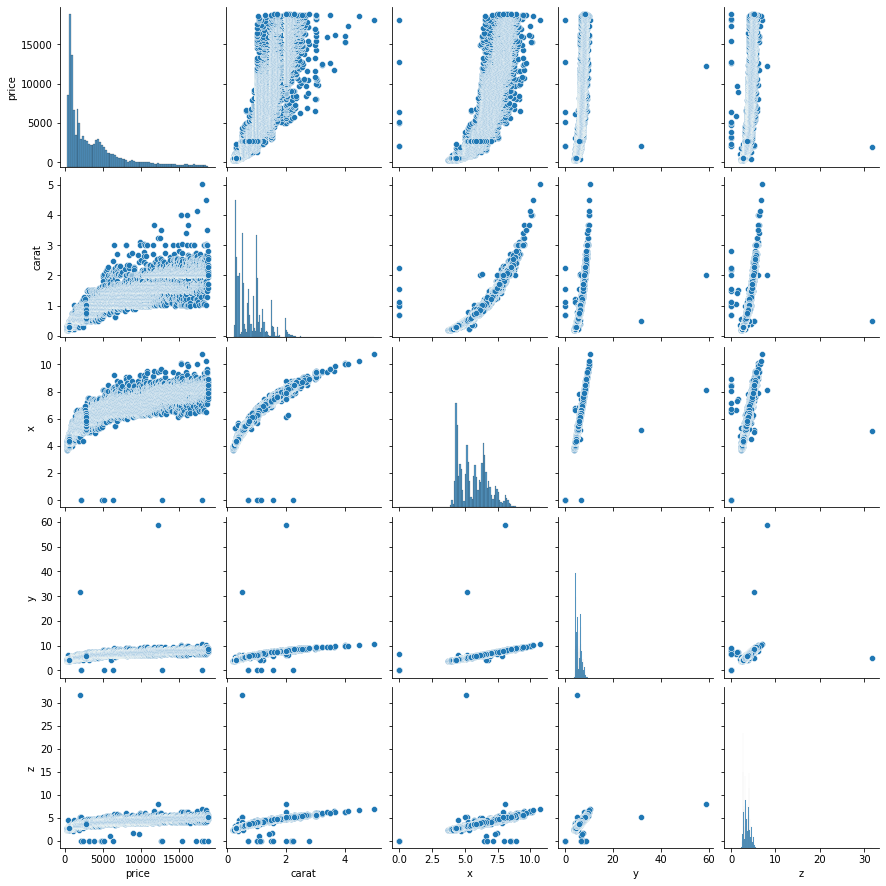

In [ ]:
attributes=['price','carat','x','y','z']
sns.pairplot(train_data[attributes]);

In [ ]:
train_data.drop(train_data[train_data["price"]> 15000].index, inplace=True)

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='carat', ylabel='price'>,
        <AxesSubplot:xlabel='x', ylabel='price'>,
        <AxesSubplot:xlabel='y', ylabel='price'>,
        <AxesSubplot:xlabel='z', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='carat'>,
        <AxesSubplot:xlabel='carat', ylabel='carat'>,
        <AxesSubplot:xlabel='x', ylabel='carat'>,
        <AxesSubplot:xlabel='y', ylabel='carat'>,
        <AxesSubplot:xlabel='z', ylabel='carat'>],
       [<AxesSubplot:xlabel='price', ylabel='x'>,
        <AxesSubplot:xlabel='carat', ylabel='x'>,
        <AxesSubplot:xlabel='x', ylabel='x'>,
        <AxesSubplot:xlabel='y', ylabel='x'>,
        <AxesSubplot:xlabel='z', ylabel='x'>],
       [<AxesSubplot:xlabel='price', ylabel='y'>,
        <AxesSubplot:xlabel='carat', ylabel='y'>,
        <AxesSubplot:xlabel='x', ylabel='y'>,
        <AxesSubplot:xlabel='y', ylabel='y'>,
        <AxesSubplot:xlabel='z', ylabel='y'>],
    

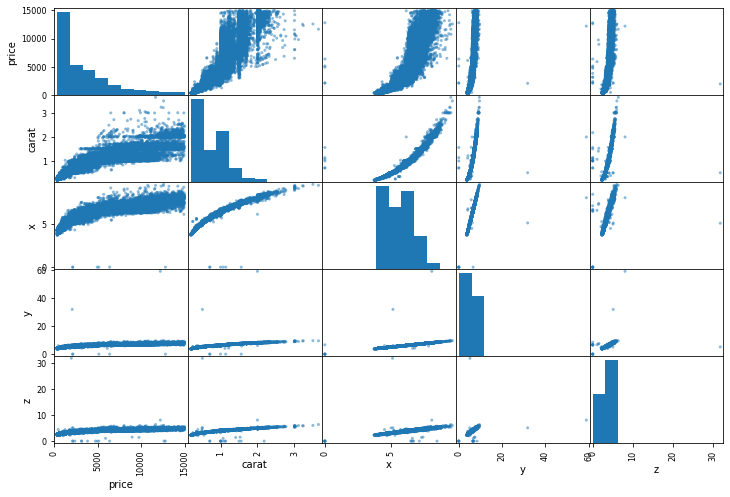

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["price", "carat", "x","y","z"]
scatter_matrix(train_data[attributes], figsize=(12, 8))

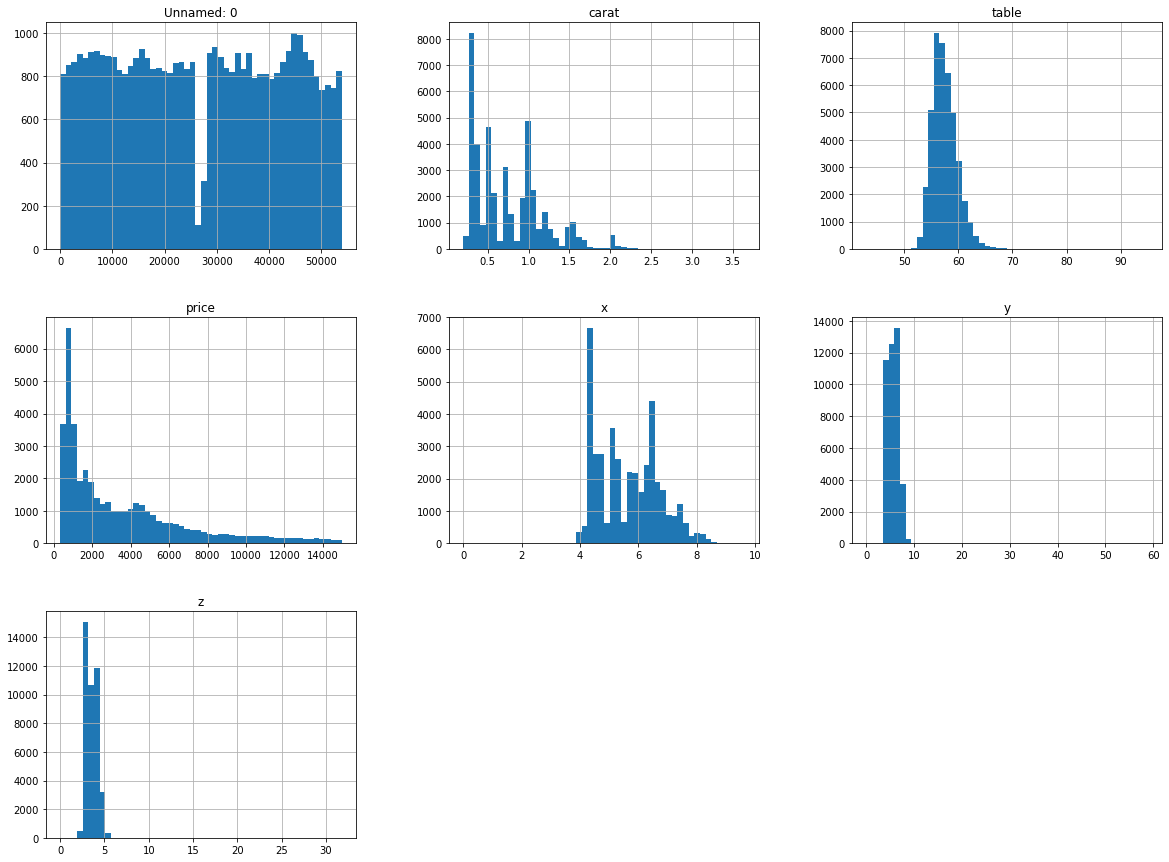

In [ ]:
train_data.hist(bins=50, figsize=(20,15));

<AxesSubplot:xlabel='carat', ylabel='price'>

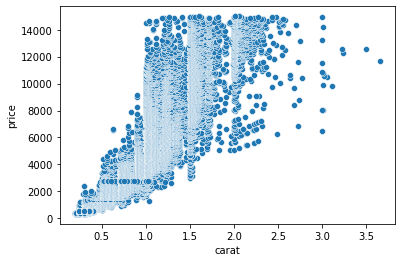

In [ ]:
 sns.scatterplot(x=train_data["carat"], y = train_data["price"])

In [ ]:
 train_data.drop(train_data[train_data["carat"]> 3].index, inplace=True)

<AxesSubplot:xlabel='carat', ylabel='price'>

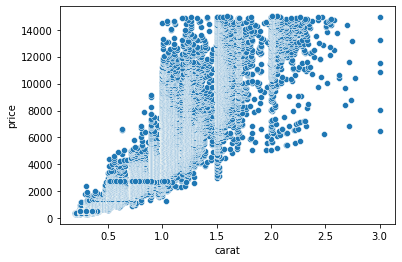

In [ ]:
sns.scatterplot(x=train_data["carat"], y = train_data["price"])

<AxesSubplot:xlabel='x', ylabel='price'>

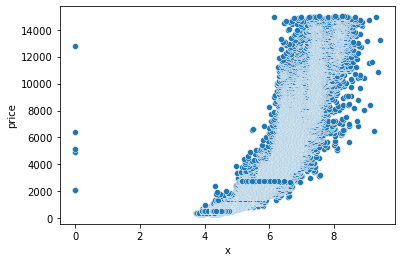

In [ ]:
 sns.scatterplot(x=train_data["x"], y = train_data["price"])

In [ ]:
train_data.drop(train_data[train_data["x"]< 2].index, inplace=True)

<AxesSubplot:xlabel='x', ylabel='price'>

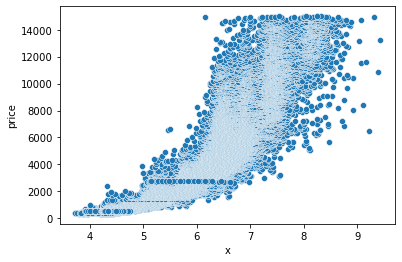

In [ ]:
 sns.scatterplot(x=train_data["x"], y = train_data["price"])

<AxesSubplot:xlabel='y', ylabel='price'>

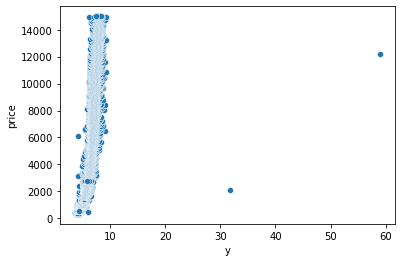

In [ ]:
sns.scatterplot(x=train_data["y"], y = train_data["price"])

In [ ]:
train_data.drop(train_data[train_data["y"]> 30].index, inplace=True)

<AxesSubplot:xlabel='y', ylabel='price'>

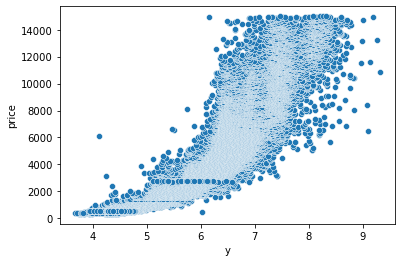

In [ ]:
sns.scatterplot(x=train_data["y"], y = train_data["price"])

C:\Users\kings\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='z', ylabel='price'>

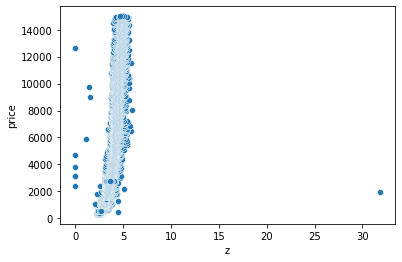

In [ ]:
sns.scatterplot(train_data["z"], y = train_data["price"])

In [ ]:
train_data.drop(train_data[train_data["z"]> 30].index, inplace=True)

C:\Users\kings\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='z', ylabel='price'>

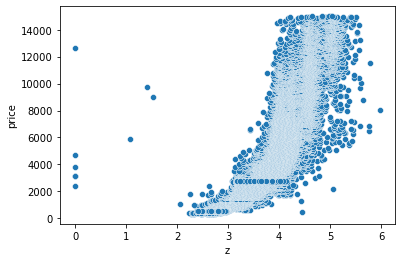

In [ ]:
sns.scatterplot(train_data["z"], y = train_data["price"])

C:\Users\kings\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='z', ylabel='price'>

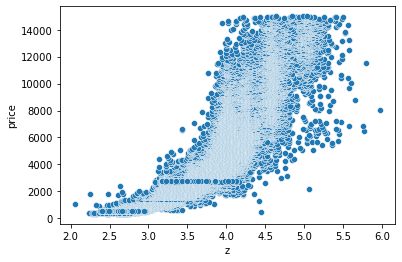

In [ ]:
train_data.drop(train_data[train_data["z"]<2].index, inplace=True)
sns.scatterplot(train_data["z"], y = train_data["price"])

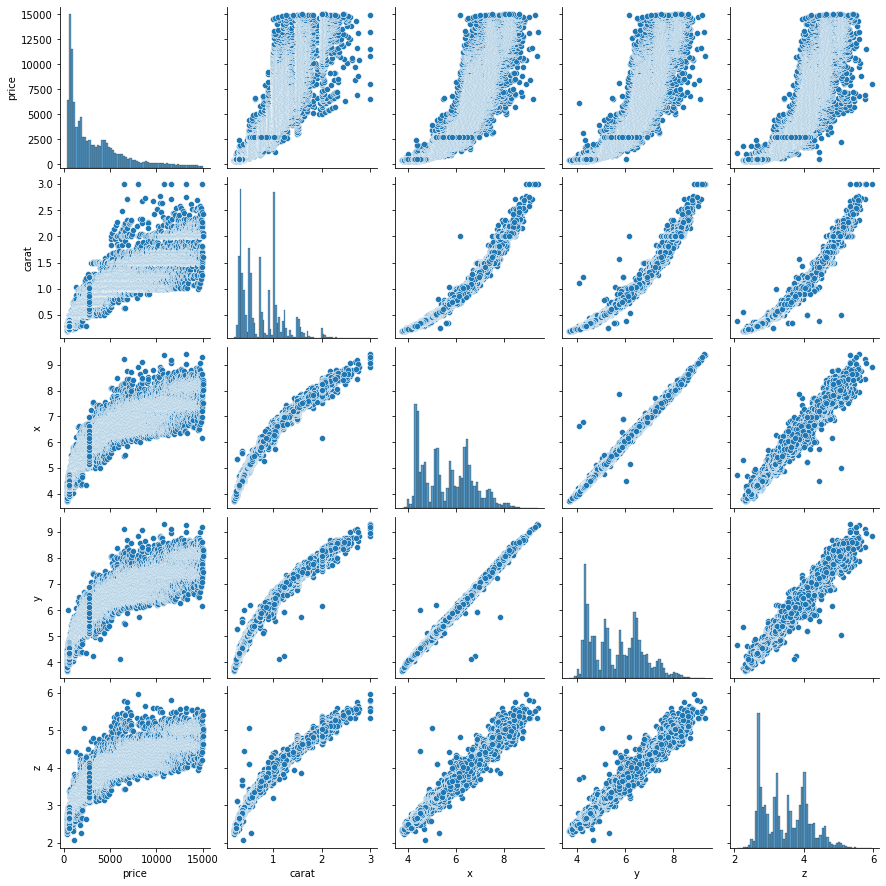

In [ ]:
attributes=['price','carat','x','y','z']
sns.pairplot(train_data[attributes]);

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='carat', ylabel='price'>,
        <AxesSubplot:xlabel='x', ylabel='price'>,
        <AxesSubplot:xlabel='y', ylabel='price'>,
        <AxesSubplot:xlabel='z', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='carat'>,
        <AxesSubplot:xlabel='carat', ylabel='carat'>,
        <AxesSubplot:xlabel='x', ylabel='carat'>,
        <AxesSubplot:xlabel='y', ylabel='carat'>,
        <AxesSubplot:xlabel='z', ylabel='carat'>],
       [<AxesSubplot:xlabel='price', ylabel='x'>,
        <AxesSubplot:xlabel='carat', ylabel='x'>,
        <AxesSubplot:xlabel='x', ylabel='x'>,
        <AxesSubplot:xlabel='y', ylabel='x'>,
        <AxesSubplot:xlabel='z', ylabel='x'>],
       [<AxesSubplot:xlabel='price', ylabel='y'>,
        <AxesSubplot:xlabel='carat', ylabel='y'>,
        <AxesSubplot:xlabel='x', ylabel='y'>,
        <AxesSubplot:xlabel='y', ylabel='y'>,
        <AxesSubplot:xlabel='z', ylabel='y'>],
    

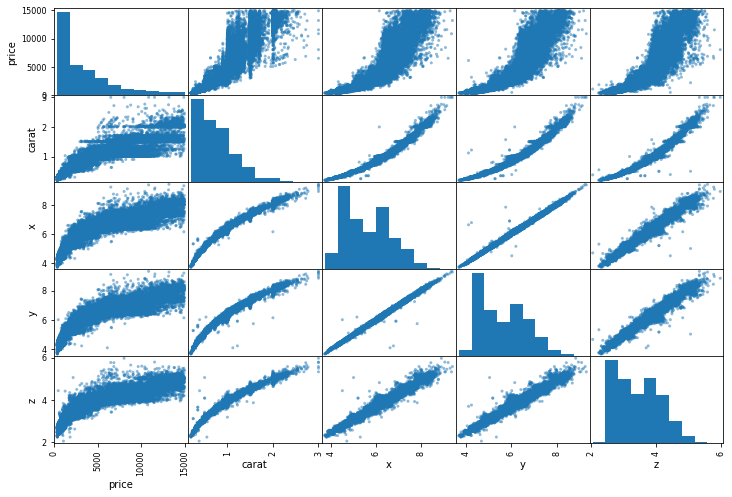

In [ ]:
attributes = ["price", "carat", "x",'y','z']
scatter_matrix(train_data[attributes], figsize=(12, 8))

In [ ]:
#Feature Engineering
train_data['volume']= train_data.x * train_data.y * train_data.z
train_data = train_data.drop(['x','y','z'], axis=1)

test_data['volume'] = test_data.x * test_data.y * test_data.z
test_data = test_data.drop(['x','y','z'], axis=1)

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='carat', ylabel='price'>,
        <AxesSubplot:xlabel='volume', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='carat'>,
        <AxesSubplot:xlabel='carat', ylabel='carat'>,
        <AxesSubplot:xlabel='volume', ylabel='carat'>],
       [<AxesSubplot:xlabel='price', ylabel='volume'>,
        <AxesSubplot:xlabel='carat', ylabel='volume'>,
        <AxesSubplot:xlabel='volume', ylabel='volume'>]], dtype=object)

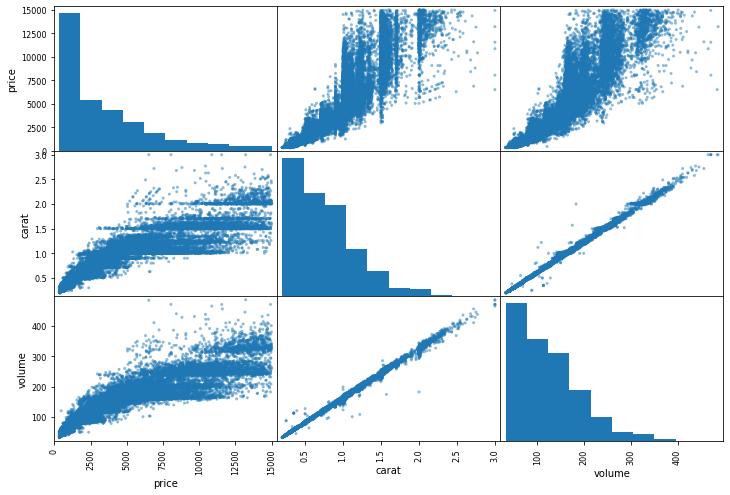

In [ ]:
attributes = ["price", "carat", "volume"]
scatter_matrix(train_data[attributes], figsize=(12, 8))

In [ ]:
train_data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
table         float64
price           int64
volume        float64
dtype: object

In [ ]:
train_data['price'] = train_data.price.astype(float)
train_data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
table         float64
price         float64
volume        float64
dtype: object

In [ ]:
x = train_data.drop(columns='price')
y = train_data['price']

# Ordinal Encoder converting categorical data into numeric from

In [ ]:
print('cut : ',train_data['cut'].unique())
print('color : ',train_data['color'].unique())
print('clarity : ',train_data['clarity'].unique())

cut :  ['Premium' 'Good' 'Very Good' 'Fair' 'Ideal']
color :  ['E' 'I' 'J' 'F' 'H' 'D' 'G']
clarity :  ['SI1' 'VS2' 'SI2' 'VVS2' 'VVS1' 'I1' 'VS1' 'IF']


In [ ]:
cat_attribs = ["cut" ,"color" , "clarity"]
num_attribs = ["Unnamed: 0","carat","table","volume"]

In [ ]:
full_pipeline = ColumnTransformer([
        ("cat", OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ['J','I','H','G','F','E','D'],
                                   ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2','VVS1', 'IF']]), cat_attribs),
        ("num", 'passthrough', num_attribs),
    ])


In [ ]:
diamonds_prepared = full_pipeline.fit_transform(x)

In [ ]:
x

,Unnamed: 0,carat,cut,color,clarity,table,volume
0,2,0.21,Premium,E,SI1,61.0,34.505856
1,4,0.29,Premium,I,VS2,58.0,46.724580
2,5,0.31,Good,J,SI2,58.0,51.917250
3,6,0.24,Very Good,J,VVS2,57.0,38.693952
4,7,0.24,Very Good,I,VVS1,57.0,38.830870
...,...,...,...,...,...,...,...
43035,53935,0.72,Premium,D,SI1,59.0,116.721246
43036,53936,0.72,Ideal,D,SI1,57.0,115.920000
43037,53937,0.72,Good,D,SI1,55.0,118.110175
43038,53939,0.86,Premium,H,SI2,58.0,140.766120


In [ ]:
diamonds_prepared.tolist()

[[3.0, 5.0, 2.0, 2.0, 0.21, 61.0, 34.505856],
 [3.0, 1.0, 3.0, 4.0, 0.29, 58.0, 46.72458],
 [1.0, 0.0, 1.0, 5.0, 0.31, 58.0, 51.917249999999996],
 [2.0, 0.0, 5.0, 6.0, 0.24, 57.0, 38.693951999999996],
 [2.0, 1.0, 6.0, 7.0, 0.24, 57.0, 38.830870000000004],
 [0.0, 5.0, 3.0, 9.0, 0.22, 61.0, 36.425214000000004],
 [1.0, 0.0, 2.0, 11.0, 0.3, 55.0, 49.6587],
 [3.0, 4.0, 2.0, 13.0, 0.22, 61.0, 34.715136],
 [4.0, 0.0, 1.0, 14.0, 0.31, 54.0, 51.515744999999995],
 [3.0, 5.0, 1.0, 15.0, 0.2, 62.0, 32.262375],
 [3.0, 5.0, 0.0, 16.0, 0.32, 58.0, 51.883728000000005],
 [4.0, 1.0, 1.0, 17.0, 0.3, 54.0, 50.130472],
 [1.0, 0.0, 2.0, 18.0, 0.3, 54.0, 48.99609000000001],
 [1.0, 0.0, 2.0, 19.0, 0.3, 56.0, 48.833658],
 [2.0, 0.0, 2.0, 20.0, 0.3, 59.0, 47.818022],
 [1.0, 1.0, 1.0, 21.0, 0.3, 56.0, 49.64177999999999],
 [2.0, 0.0, 2.0, 24.0, 0.31, 62.0, 50.952974],
 [2.0, 0.0, 2.0, 25.0, 0.31, 62.0, 51.403212],
 [3.0, 1.0, 4.0, 27.0, 0.24, 57.0, 38.635246],
 [2.0, 0.0, 3.0, 28.0, 0.3, 57.0, 49.13868],
 [1.0, 2

# Training Data

In [ ]:
#Train Split
X_train, X_rem, y_train, y_rem = train_test_split(diamonds_prepared,y,train_size=0.8,random_state=42)
#Validation & Testing
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem,test_size=0.5,random_state=42)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(33275, 7) (4159, 7) (4160, 7)


In [ ]:
def accuracies(model):
    
    # Train
    pred_train = model.predict(X_train)
    r2_train = r2_score(pred_train, y_train)*100
    mse_train = mean_squared_error(pred_train, y_train, squared = False)
    rmse_train = np.sqrt(mse_train)
    print("**** Training *****")
    print("R2: ", r2_train)
    print("RMSE: ", rmse_train)
    
    # Validation
    pred_validation = model.predict(X_val)
    r2_val = r2_score(pred_validation, y_val)*100
    mse_val = mean_squared_error(pred_validation, y_val, squared = False)
    rmse_val = np.sqrt(mse_val)
    print("\n**** Validataion ****")
    print("R2: ", r2_val)
    print("RMSE: ", rmse_val)
    
    # Testing
    pred_test = model.predict(X_test)
    r2_test = r2_score(pred_test, y_test)*100
    mse_test = mean_squared_error(pred_test, y_test, squared = False)
    rmse_test = np.sqrt(mse_test)
    print("\n**** Test ****")
    print("R2: ", r2_test)
    print("RMSE: ", rmse_test)

# Linear Regression Algorithm

In [ ]:
linReg = LinearRegression()
linReg.fit(X_train,y_train)
accuracies(linReg)

**** Training *****
R2:  90.03343455967496
RMSE:  31.519424296898446

**** Validataion ****
R2:  90.09589668832339
RMSE:  31.241445159410837

**** Test ****
R2:  89.62934896613217
RMSE:  31.71010288938034


# DecisionTree Regressor Algorithm

In [ ]:
DecReg = DecisionTreeRegressor()
DecReg.fit(X_train,y_train)
accuracies(DecReg)

**** Training *****
R2:  100.0
RMSE:  0.0

**** Validataion ****
R2:  99.93703859860584
RMSE:  9.078420367386256

**** Test ****
R2:  99.99415521062201
RMSE:  4.9951212293075


Accuracy score of DecisionTree Regressor model

# RandomForest Regressor Algorithm

In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
accuracies(rf)

**** Training *****
R2:  99.9985172748627
RMSE:  3.5645862007092366

**** Validataion ****
R2:  99.9950008405073
RMSE:  4.818853776545526

**** Test ****
R2:  99.99767769116026
RMSE:  3.9660386473664935


# Overall Accuarcy Score

In [ ]:
print("  accuarcy all algorithm")
print("----------------------------")
print("\n LinearRegression: \n")
accuracies(linReg)
print("----------------------------\n\n")

print("Decision Tree: \n")
accuracies(DecReg)

print("----------------------------\n\n")
print("\n RandomForest Regressor  : \n")
accuracies(rf)
print("----------------------------")

  accuarcy all algorithm
----------------------------

 LinearRegression: 

**** Training *****
R2:  90.03343455967496
RMSE:  31.519424296898446

**** Validataion ****
R2:  90.09589668832339
RMSE:  31.241445159410837

**** Test ****
R2:  89.62934896613217
RMSE:  31.71010288938034
----------------------------


Decision Tree: 

**** Training *****
R2:  100.0
RMSE:  0.0

**** Validataion ****
R2:  99.93703859860584
RMSE:  9.078420367386256

**** Test ****
R2:  99.99415521062201
RMSE:  4.9951212293075
----------------------------



 RandomForest Regressor  : 

**** Training *****
R2:  99.9985172748627
RMSE:  3.5645862007092366

**** Validataion ****
R2:  99.9950008405073
RMSE:  4.818853776545526

**** Test ****
R2:  99.99767769116026
RMSE:  3.9660386473664935
----------------------------


# Submission Test Data

In [ ]:
diamonds_prepared_test = full_pipeline.fit_transform(test_data)
model = RandomForestRegressor()
model.fit(diamonds_prepared, y)
y_pred_final = model.predict(diamonds_prepared_test)

In [ ]:
y_pred_final

array([ 333.84,  332.77,  336.5 , ..., 2756.04, 2756.62, 2756.99])

In [ ]:
submission = test_data[['Unnamed: 0']]
submission['price'] = y_pred_final

C:\Users\kings\AppData\Local\Temp/ipykernel_14648/3697872784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price'] = y_pred_final


In [ ]:
submission

,Unnamed: 0,price
0,1,333.84
1,3,332.77
2,8,336.50
3,10,336.32
4,12,339.51
...,...,...
10895,53922,2753.30
10896,53923,2755.90
10897,53933,2756.04
10898,53934,2756.62


In [ ]:
submission.to_csv("sample_submission.csv",index=None)

In [ ]:
pd.read_csv("sample_submission.csv")

,Unnamed: 0,price
0,1,333.84
1,3,332.77
2,8,336.50
3,10,336.32
4,12,339.51
...,...,...
10895,53922,2753.30
10896,53923,2755.90
10897,53933,2756.04
10898,53934,2756.62
